# Prediction using Unsupervised ML

## Objective: Predict the optimum number of clusters using 'Iris' dataset and represent it visually.

### GRIP
#### The Sparks Foundation
### Author: Deepika Dhania

### Steps Involved-
1. Importing libraries
2. Loading dataset
3. Exploring dataset
4. preprocessing data
5. Plotting the data as pair plot
6. Plotting heat map of correlation data
7. Using K-mean clustering algorithm
8. Training the model
9. Visulaizing the clusters & plot centroids


#### Importing required libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sb

#### Importing Iris Dataset

In [13]:
iris= datasets.load_iris()
df= pd.DataFrame(iris.data, columns= iris.feature_names)

### Exploring data
#### Printing first 5 rows

In [14]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
df.shape

(150, 4)

Iris dataset consist of 4 columns and 150 rows.

In [17]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Dataset has no null values with datatype integer.

### Preprocessing data

In [18]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
iris.target.shape

(150,)

### Plotting the data as pair plot

<Figure size 2160x2160 with 0 Axes>

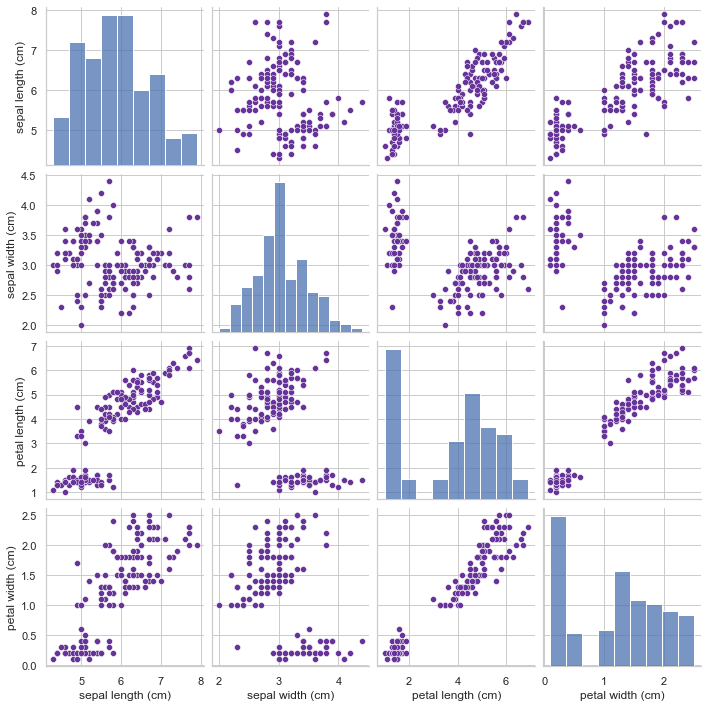

In [29]:
sb.set(style='whitegrid')
plt.figure(figsize=(30,30))
sb.pairplot(df, plot_kws= {'color':'rebeccapurple'});

<AxesSubplot:>

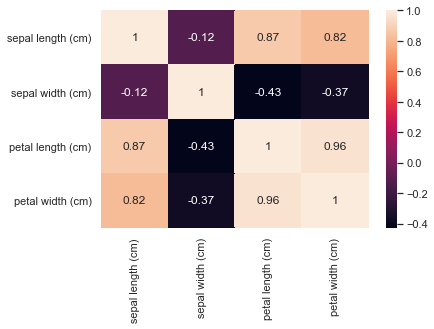

In [26]:
sb.heatmap(df.corr(),annot=True)

#### Creating array of dependent variables

In [30]:
x=df.iloc[:,:].values

#### Using K-means cluster algorithm
##### To find the perfect value for cluster

In [31]:
from sklearn.cluster import KMeans
wcss=[] #sum of squares within cluster
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#### Plotting the results on a line graph

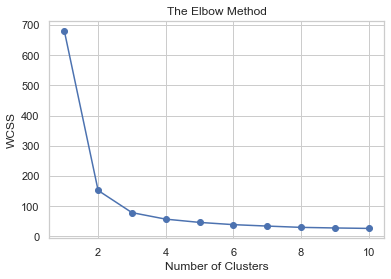

In [47]:
plt.plot(range(1,11),wcss, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS") #within cluster sum of squares
plt.grid(True)
plt.show()

The graph above shows that there are 3 optimal clusters. Now, we can visualize the elbow bending line at k=3.

### Training the model
#### Creating the K-means classifier

In [52]:
kmeans= KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means=kmeans.fit_predict(x)
print("TRAINING COMPLETED")

TRAINING COMPLETED


#### Visualizing the clusters & plot centroids

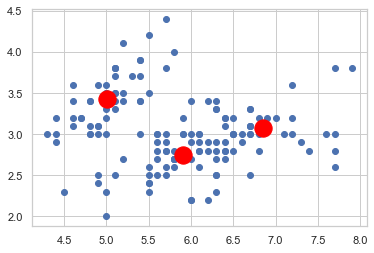

In [53]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red')
plt.show()

#### Visualizing the clusters on first two columns

Text(0.5, 1.0, 'Cluster Visual')

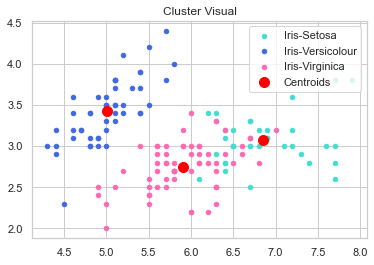

In [48]:
plt.scatter(x[y_means==0,0], x[y_means==0,1], s=20, c='turquoise', label='Iris-Setosa')
plt.scatter(x[y_means==1,0], x[y_means==1,1], s=20, c='royalblue', label='Iris-Versicolour')
plt.scatter(x[y_means==2,0], x[y_means==2,1], s=20, c='hotpink', label='Iris-Virginica')

#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,c='red', label="Centroids")
plt.legend()
plt.title("Cluster Visual")